## Korelace

- Za pomoci metody corr() lze zobrazit korelační matici s informacemi o korelaci mezi číselnými sloupci dataframe, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- Za pomoci metody corr() volané nad sloupcem lze vypočítat korelační koeficient mezi dvěmi sloupci, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- Za pomoci metody corrwith() lze spočítat korelaci mezi řádky či sloupci dvou dataframe, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html
- Za pomoci metody plot.scatter() ze vizualizovat korelační diagram, viz https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
- DataFrame může být použit jako vstupní argument vizuálů knihovny Seaborn


In [10]:
import pandas as pd
# V teto casti budeme upravovat vizualy, proto importujeme i pyplot
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE',drop=True,inplace=True)


       STATION    NAME        DATE  PRCP  SNWD  TAVG  TMAX  TMIN
0  GME00132274  PIDING  2006-12-01   0.0   0.0   NaN   4.2   1.0
1  GME00132274  PIDING  2006-12-02   0.0   0.0   NaN   1.8  -1.7
2  GME00132274  PIDING  2006-12-03   0.0   0.0   NaN   5.1  -4.6
3  GME00132274  PIDING  2006-12-04  19.0   0.0   NaN   8.3  -0.9
4  GME00132274  PIDING  2006-12-05   0.0   0.0   NaN  12.0   0.9


In [11]:
# Vypocet korelacniho koefecientu mezi dvemi sloupci za pomoci vychozi, tj. Pearsonovy metody
df['TMAX'].corr(df['TMIN'])


0.885342743778731

In [3]:
# Zobrazeni korelacni matice
df.corr()

C:\Users\Student\AppData\Local\Temp\ipykernel_8888\1539602561.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


PRCP      SNWD      TAVG      TMAX      TMIN
PRCP  1.000000 -0.034381  0.059263  0.062604  0.130835
SNWD -0.034381  1.000000 -0.482771 -0.477185 -0.462475
TAVG  0.059263 -0.482771  1.000000  0.980213  0.955945
TMAX  0.062604 -0.477185  0.980213  1.000000  0.885343
TMIN  0.130835 -0.462475  0.955945  0.885343  1.000000

In [4]:
# Zde si dynamicky vytvarime promenne typu DataFrame pro jednotlive NAME z dataframe df
for name in df['NAME'].unique():
    globals()[f'df_{name}'] = df.loc[df['NAME']==name]
   

In [5]:
# Vypocet korelace mezi dvemi dataframe na urovni indexu
df_RUZYNE.corrwith(df_MOSNOV,axis=0)


C:\Users\Student\AppData\Local\Temp\ipykernel_8888\3116932655.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_RUZYNE.corrwith(df_MOSNOV,axis=0)


PRCP    0.194271
SNWD    0.280571
TAVG    0.970677
TMAX    0.961232
TMIN    0.936237
dtype: float64

In [6]:
# Vypocet korelace mezi dvemi dataframe na urovni sloupcu
df_RUZYNE.corrwith(df_MOSNOV,axis=1)

C:\Users\Student\AppData\Local\Temp\ipykernel_8888\3741683898.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_RUZYNE.corrwith(df_MOSNOV,axis=1)


DATE
2000-01-01    0.991130
2000-01-02    1.000000
2000-01-03    0.946186
2000-01-04    1.000000
2000-01-05         NaN
                ...   
2020-11-15    1.000000
2020-11-16    1.000000
2020-11-17    0.964554
2020-11-18    1.000000
2003-01-13         NaN
Length: 7601, dtype: float64

<AxesSubplot: xlabel='TMAX', ylabel='TMIN'>

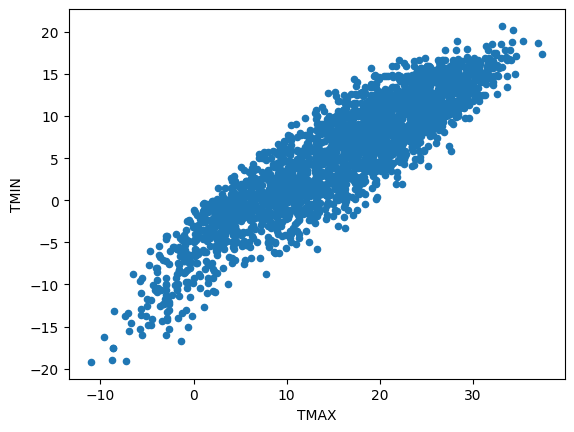

In [7]:
# Zobrazeni korelacniho diagramu
df_RUZYNE.plot.scatter(x='TMAX',y='TMIN')



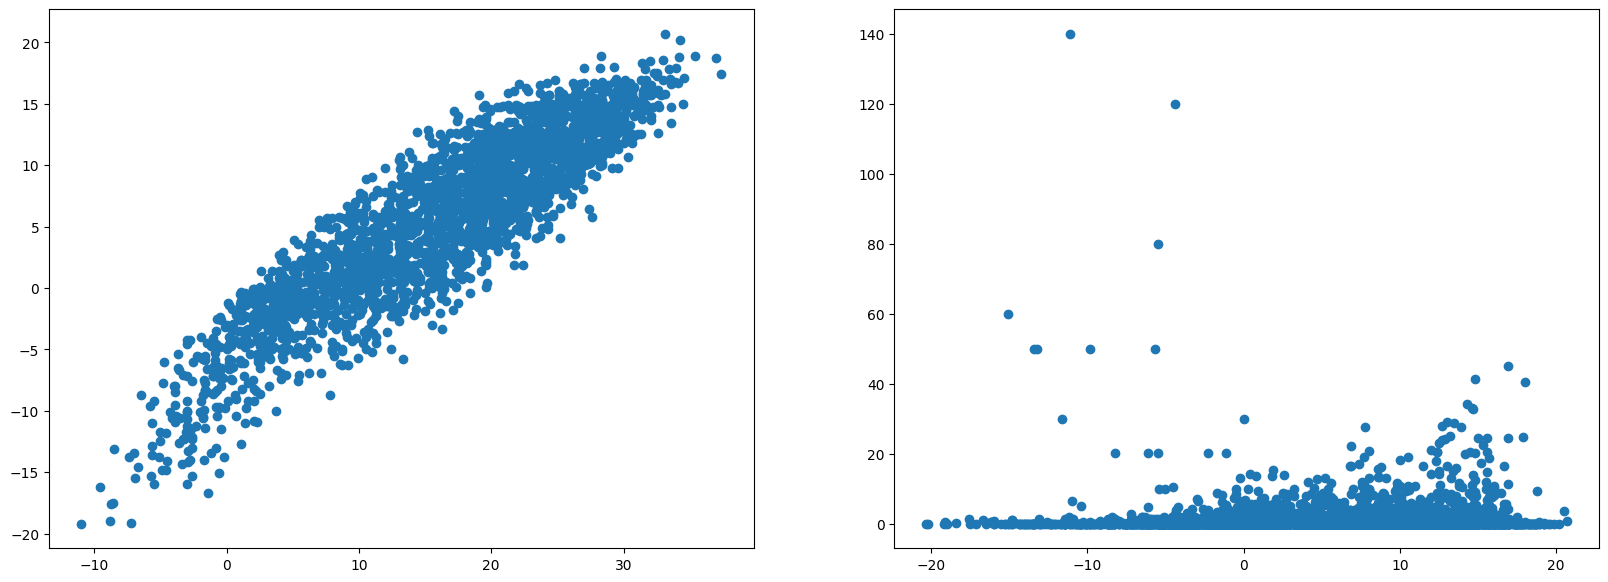

In [8]:
# Vytvoreni dvou korelacnich diagramu (axes) v ramci jednoho vizualu (fig)
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))

ax1.scatter(x=df_RUZYNE['TMAX'],y=df_RUZYNE['TMIN'])
ax2.scatter(x=df_RUZYNE['TMIN'],y=df_RUZYNE['PRCP'])
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_8888\1812961885.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,ax=axes[0])
C:\Users\Student\AppData\Local\Temp\ipykernel_8888\1812961885.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
C:\Users\Student\AppData\Local\Temp\ipykernel_8888\1812961885.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,mask=matrix,ax=axes[1])


<AxesSubplot: >

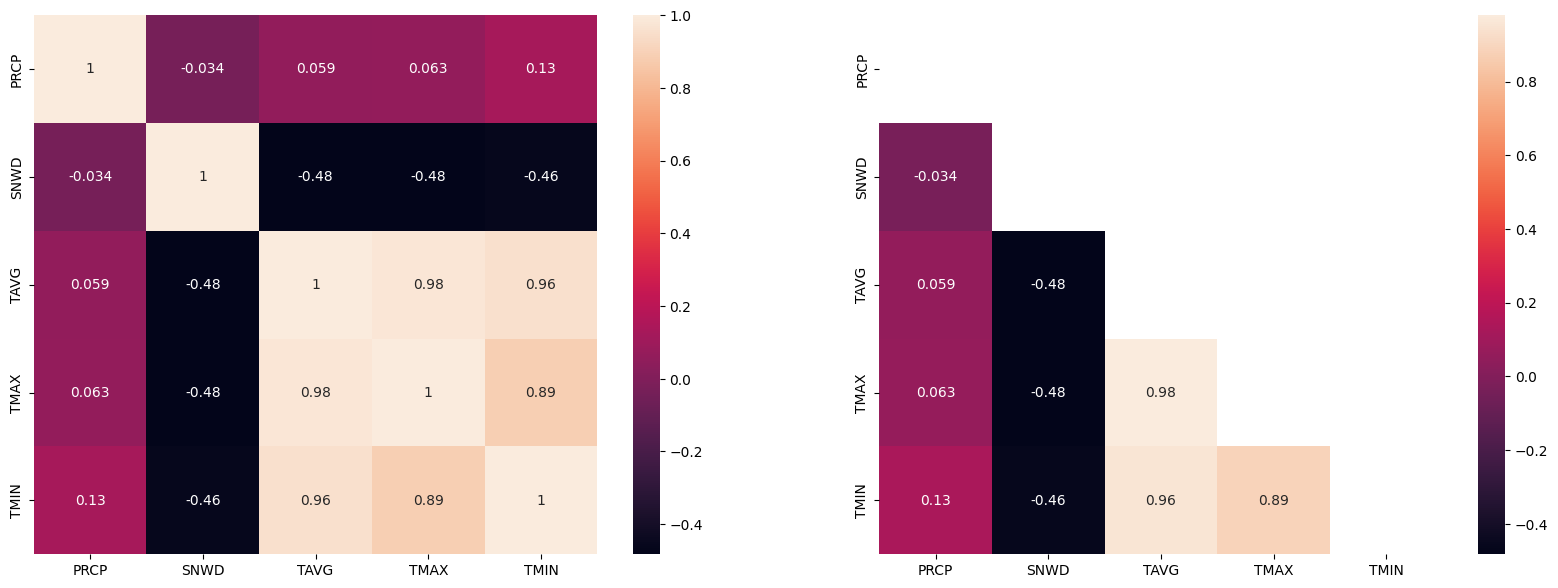

In [9]:
# Definice vizualu (fig) o dvou grafex (axes)
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
# Definice korelacni heatmapy coby prvniho vizualu
sns.heatmap(df.corr(),annot=True,ax=axes[0])

# Definice podoby vizualu
matrix = np.triu(df.corr())
# Definice korelacni heatmapy s urpavenym tvarem
sns.heatmap(df.corr(),annot=True,mask=matrix,ax=axes[1])
